# K-means -- Clustering

## 1. 4-step understanding(EN) -- thinking

**What**
(What kind of model is it? Supervised / Unsupervised / Probabilistic?)


1. K-means is an unsupervised clustering method that explicitly defines an optimization objective: minimizing the within-cluster sum of squared distances (also called inertia or SSE).

1. In practice, this objective is optimized using Lloyd’s algorithm, which alternates between an assignment step (assigning points to the nearest centroid) and an update step (recomputing centroids as cluster means).

**Why**
(Why does this model exist? What problem does it solve?)


Many real datasets have no labels, but still contain hidden structure. In practice,
- We often don't know the categories in advance
- we still want to discover patterns or groups
- Humans can't see structure in high-dimensional data

K-means exists to automatically reveal structure in unlabeled data.

**How**
(Describe the mechanism in plain language, step by step.)

1. Initialization, 
    1. Choose the number of clusters K, 
    1. Initialize K centroids, either randomly or using a heuristic method such as k-means++
1. Assignment

    Assign each data point to the cluster whose centroid is closest, usually measured by Euclidean distance.
1. Update

    Recompute each centroid as the mean of all data points assigned to that cluster

1. Convergence check

    Repeat the assignment and update steps until the centroids no longer change significantly, or a maxium number of iterations is reached. Objective: minimize within-cluster sum of squared distances (inertia/SSE).
Each iteration monotonically decreases the objective until convergence (local optimum).


**Failure/Limitations**(When does it fail? What assumptions does it make?)

Core assumptions of K-means
1. Clusters are compact and roughly spherical. Points in a cluster are close to their centroid; Distance to the centroid is meaningful, which implies ***ball-shaped clusters***

1. All clusters have similar size and density. Each cluster contributes similarly to the objective; No cluster is extremely large or small.

1. Distance metric represents similarity. Usually Euclidean distance;Features ae on comparable scales, which requires ***feature scaling***

1. K is known or reasonable. K is fixed before learning; Algorithm does not discover K by itself.

1. Mean is a valid reprentative. The cluster center is meaningful as an average; Works for numeric, continuous features.

( assuption 2: bc K-means minimizes the total squared distance to cluster centroid, which gives more weight to large or dense clusters. If clusters have every deifferent sizes or densities, large clusters dominate the optimization and small clusters may be merged or ignored.

assumption 3: the distance metric is assumed to correctly represent similarity. In other words, points that are close in feature space are considered similar, which requires properly scaled numerical features.)

**Other models**

|Problem|Alternative|
|--|:--:|
|Non-spherical shapes|DBSCAN|
|Different densities|DBSCAN/HDBSCAN|
|Soft membership|GMM|
|Hierarchical structure|Agglomerative clustering|
|Noise robustness|Density-based methods|

## 2. Fiche récapitulative(FR) -- Communication


### Concept (Définition simple et claire du modèle.)

### Principe(Mécanisme)(Étapes principales ou logique de fonctionnement.)

### Applications(Où et quand utiliser ce modèle.)

### Limites(Principales faiblesses ou hypothèses.)

## 3. Code demo

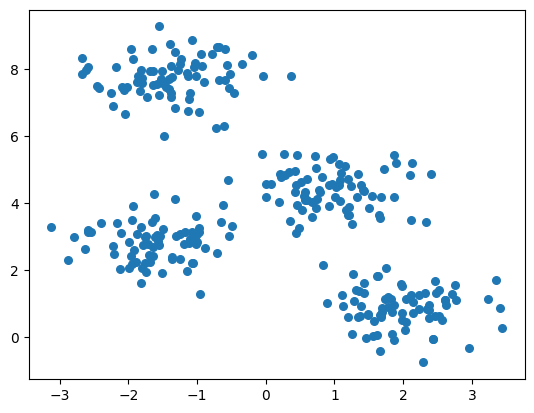

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], s=30)
plt.show()


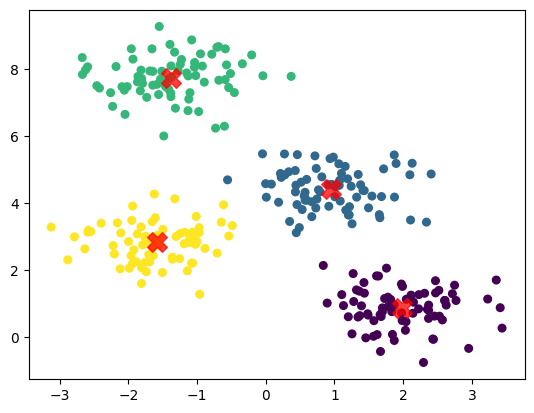

In [ ]:
K = 4
km = KMeans(n_clusters=K,n_init=10, random_state=42)
labels = km.fit_predict(x)  

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], x[:, 1], c=labels, s=30, cmap='viridis')
centers = km.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()


## 4. Failure cases